<a href="https://colab.research.google.com/github/Colsai/DATA-690-WANG/blob/master/hw7/Assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
#I'm doing this through Colab (Mounting Drive)
#from google.colab import drive
#drive.mount('/content/drive')

### Assignment 07

**You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.**

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 5):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.
```
Assignment7/
    - assignment_07.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
```


In [238]:
# Import libraries

#(Write code here)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [239]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

#(Write code here)
os.getcwd()

'/content'

In [240]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

#(Write code here)
os.listdir('drive/My Drive/College Data')

['FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2011_12_PP.csv']

In [241]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

#(Write code here)
dir = os.listdir('drive/My Drive/College Data')

csv_files = []

for file in dir:
    if ".csv" and "MERGED" in file:
        csv_files.append(file)

    else:
        csv_files

csv_files

['MERGED2018_19_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2011_12_PP.csv']

In [242]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.

# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

#(Write code here)

file_dir = 'drive/My Drive/College Data/'
full_df = []

for file in csv_files:
    df = pd.read_csv(file_dir + file, usecols = ["UNITID", 
                                                 "INSTNM", 
                                                 "STABBR", 
                                                 "REGION", 
                                                 "ADM_RATE", 
                                                 "TUITIONFEE_IN"])
    
    years = file.replace("MERGED","").replace("_","").replace("PP.csv","") #File is YYYY + new YY
    years = int(years[0:4]) #Create a substring as only YYYY

    df.insert(0, "YEARS", years, True) #Insert substring as first column (since year is most useful)
    
    full_df.append(df)

In [243]:
full_df[5]

,YEARS,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
0,1999,100654,Alabama A & M University,AL,5,NaN,NaN
1,1999,100663,University of Alabama at Birmingham,AL,5,NaN,NaN
2,1999,100690,Amridge University,AL,5,NaN,NaN
3,1999,100706,University of Alabama in Huntsville,AL,5,NaN,NaN
4,1999,100724,Alabama State University,AL,5,NaN,NaN
...,...,...,...,...,...,...,...
6604,1999,436784,Universal Career Community College Inc,PR,9,NaN,NaN
6605,1999,436809,Willsey Institute,NY,2,NaN,NaN
6606,1999,437042,ITT Technical Institute-Saint Rose,LA,5,NaN,NaN
6607,1999,437413,EURO HAIR DESIGN INSTITUTE,FL,5,NaN,NaN


In [244]:
#Concat can be used to combine all the elements within the list
full_df = pd.concat(full_df)

In [245]:
#Lets sort the full_df
full_df = full_df.sort_values(by="YEARS")

In [246]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)
len(full_df)

163331

In [297]:
full_df.shape

(163331, 7)

In [298]:
full_df.describe()

,YEARS,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,163331.000000,1.633310e+05,163330.000000,44911.000000,79194.000000
mean,2007.249481,9.432395e+05,4.554693,0.692946,11665.505367
std,6.608266,4.571721e+06,2.189217,0.217062,9985.998016
min,1996.000000,1.006360e+05,0.000000,0.000000,0.000000
25%,2002.000000,1.633380e+05,3.000000,0.555000,3776.000000
50%,2008.000000,2.127800e+05,5.000000,0.717500,9285.000000
75%,2013.000000,4.075680e+05,6.000000,0.857100,16146.000000
max,2018.000000,4.914640e+07,9.000000,1.000000,74787.000000


In [248]:
full_df.head(3)

,YEARS,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
3514,1996,196158,SUNY at Fredonia,NY,2.0,NaN,NaN
2397,1996,169488,DAVENPORT UNIVERSITY-KALAMAZOO CAMPUS,MI,3.0,NaN,NaN
2398,1996,169497,DAVENPORT UNIVERSITY-LANSING CAMPUS,MI,3.0,NaN,NaN


In [249]:
full_df.tail(3)

,YEARS,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
4544,2018,434344,Toni & Guy Hairdressing Academy-Worcester,MA,1.0,NaN,NaN
4546,2018,434432,Myotherapy Institute,NE,4.0,NaN,16750.0
0,2018,100654,Alabama A & M University,AL,5.0,0.8986,9744.0


In [250]:
full_df.sample(3)

,YEARS,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
82,2013,103963,Platt College-Arizona Automotive Institute Ari...,AZ,6.0,NaN,NaN
6293,2009,447014,Daytona College,FL,5.0,NaN,NaN
6248,2017,483425,Alexander Paul Institute of Hair Design,NC,5.0,NaN,NaN


In [251]:
full_df.isnull().sum(axis = 0)

YEARS                 0
UNITID                0
INSTNM                0
STABBR                0
REGION                1
ADM_RATE         118420
TUITIONFEE_IN     84137
dtype: int64

In [252]:
full_df.describe()

,YEARS,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,163331.000000,1.633310e+05,163330.000000,44911.000000,79194.000000
mean,2007.249481,9.432395e+05,4.554693,0.692946,11665.505367
std,6.608266,4.571721e+06,2.189217,0.217062,9985.998016
min,1996.000000,1.006360e+05,0.000000,0.000000,0.000000
25%,2002.000000,1.633380e+05,3.000000,0.555000,3776.000000
50%,2008.000000,2.127800e+05,5.000000,0.717500,9285.000000
75%,2013.000000,4.075680e+05,6.000000,0.857100,16146.000000
max,2018.000000,4.914640e+07,9.000000,1.000000,74787.000000


In [253]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMBC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)

def college_finder(dataframe, column, name):
    find_it = dataframe[dataframe[column].str.contains(name)]
    return find_it

#Now if we needed to, we could search for all of them at once.
umbc_df = college_finder(full_df, "INSTNM", "University of Maryland-Baltimore County")

umbc_df = umbc_df.sort_values(by="YEARS")

In [254]:
umbc_df.head()

,YEARS,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
2151,1996,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN
2049,1997,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN
1982,1998,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN
1955,1999,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN
1926,2000,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0


In [255]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)
len(umbc_df) -1 == 2018-1996 #Check that there is a single instance for every year

True

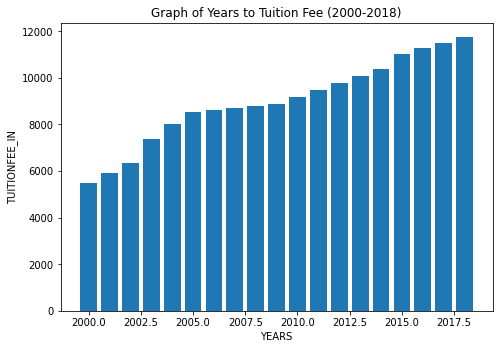

In [279]:
# <9>
# Plot UMBC's in-state tuition overtime from 1996 to 2019 using Bar Chart

#(Write code here)
x = umbc_df['YEARS']
y = umbc_df['TUITIONFEE_IN']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(x,y)
plt.xscale('linear')

ax.set_title("Graph of Years to Tuition Fee (2000-2018)", color='black')
ax.set_xlabel("YEARS", color='black')
ax.set_ylabel("TUITIONFEE_IN", color='black')

plt.show()

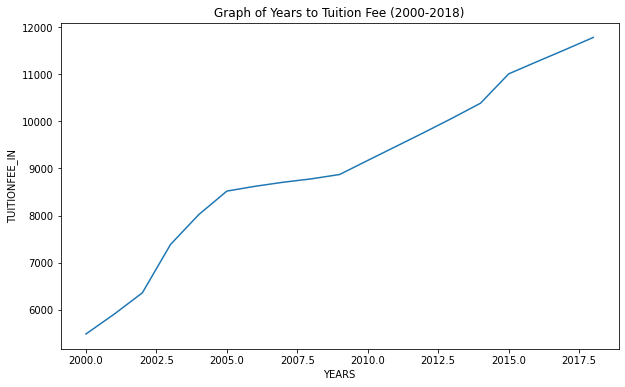

In [283]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

#(Write code here)
#(Write code here)
x = umbc_df['YEARS']
y = umbc_df['TUITIONFEE_IN']

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(x,y)
plt.xscale('linear')

ax.set_title("Graph of Years to Tuition Fee (2000-2018)", color='black')
ax.set_xlabel("YEARS", color='black')
ax.set_ylabel("TUITIONFEE_IN", color='black')

fig.show()

In [258]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

#(Write code here)
tuition_list = umbc_df['TUITIONFEE_IN'].to_list()
print(tuition_list)

[nan, nan, nan, nan, 5490.0, 5910.0, 6362.0, 7388.0, 8020.0, 8520.0, 8622.0, 8708.0, 8780.0, 8872.0, 9171.0, 9467.0, 9764.0, 10068.0, 10384.0, 11006.0, 11264.0, 11518.0, 11778.0]


In [259]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

 #(Write code here)

umbc_percent_list = []

for tuit in tuition_list:
    try:
          pct_increase = ((tuit - last_year_tuition) / last_year_tuition) * 100
    except:
          pct_increase = 0

    umbc_percent_list.append(pct_increase)
    last_year_tuition = tuit

    print(last_year_tuition, end = " ")

print(f"\n {umbc_percent_list}")

nan nan nan nan 5490.0 5910.0 6362.0 7388.0 8020.0 8520.0 8622.0 8708.0 8780.0 8872.0 9171.0 9467.0 9764.0 10068.0 10384.0 11006.0 11264.0 11518.0 11778.0 
 [nan, nan, nan, nan, nan, 7.650273224043716, 7.648054145516074, 16.12700408676517, 8.554412560909583, 6.234413965087282, 1.1971830985915493, 0.9974483878450475, 0.8268259072117593, 1.0478359908883828, 3.370153291253381, 3.227565151019518, 3.1372134783986483, 3.11347808275297, 3.1386571315057608, 5.989984591679507, 2.344175904052335, 2.254971590909091, 2.2573363431151243]


In [260]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

#(Write code here)

umbc_percent_list_rd = [round(cost, 2) for cost in umbc_percent_list]

In [261]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

#(Write code here
umbc_df.insert(0, "YEAR_PCT_INC", umbc_percent_list_rd)

In [262]:
print(umbc_df)

      YEAR_PCT_INC  YEARS  UNITID  ... REGION ADM_RATE  TUITIONFEE_IN
2151           NaN   1996  163268  ...    2.0      NaN            NaN
2049           NaN   1997  163268  ...    2.0      NaN            NaN
1982           NaN   1998  163268  ...    2.0      NaN            NaN
1955           NaN   1999  163268  ...    2.0      NaN            NaN
1926           NaN   2000  163268  ...    2.0      NaN         5490.0
1915          7.65   2001  163268  ...    2.0   0.6551         5910.0
1893          7.65   2002  163268  ...    2.0   0.6327         6362.0
1873         16.13   2003  163268  ...    2.0   0.5757         7388.0
1830          8.55   2004  163268  ...    2.0   0.7014         8020.0
1819          6.23   2005  163268  ...    2.0   0.7143         8520.0
1799          1.20   2006  163268  ...    2.0   0.7153         8622.0
1779          1.00   2007  163268  ...    2.0   0.6895         8708.0
1767          0.83   2008  163268  ...    2.0   0.7174         8780.0
1745          1.05  

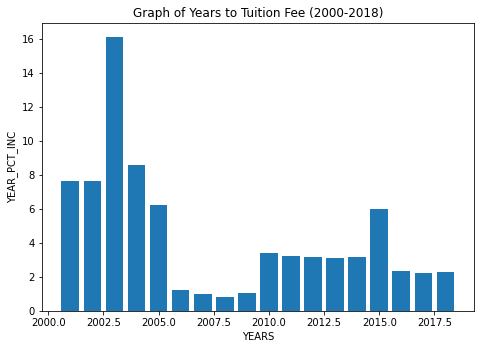

In [265]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

# Bar Chart

#(Write code here)
x = umbc_df['YEARS']
y = umbc_df['YEAR_PCT_INC']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(x,y)
ax.set_title("Graph of Years to Tuition Fee (2000-2018)", color='black')
ax.set_xlabel("YEARS", color='black')
ax.set_ylabel("YEAR_PCT_INC", color='black')

plt.show()

In [ ]:
#Line Chart
x = umbc_df['YEARS']
y = umbc_df['YEAR_PCT_INC']

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(x,y)

ax.set_title("Graph of Years to Tuition Fee (2000-2018)", color='black')
ax.set_xlabel("YEARS", color='black')
ax.set_ylabel("Tuition Percent Increase", color='black')

fig.show()

In [266]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

#(Write code here)

In [272]:
def percent_change(tuition_list):
    percent_list = []
    percent_change = 0
    last_year_tuition = 0

    for year in tuition_list:
        try:
              pct_increase = ((year - last_year_tuition) / last_year_tuition) * 100
        except:
              pct_increase = 0

        percent_list.append(round(pct_increase,2))
        last_year_tuition = tuit

        print(last_year_tuition, end = " ")

    return percent_list

In [273]:
percent_change())

11778.0 11778.0 11778.0 

[0, -99.97, -99.97]

In [287]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)
def college_finder(dataframe, column, name):
    find_it = dataframe[dataframe[column].str.contains(name)]
    return find_it

#Now if we needed to, we could search for all of them at once.
jhu_df = college_finder(full_df, "INSTNM", "Johns Hopkins")
jhu_df = jhu_df.sort_values(by="YEARS")

In [294]:
jhu_df

,YEARS,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
2139,1996,162928,Johns Hopkins University,MD,2.0,NaN,NaN
2039,1997,162928,Johns Hopkins University,MD,2.0,NaN,NaN
1973,1998,162928,Johns Hopkins University,MD,2.0,NaN,NaN
1946,1999,162928,Johns Hopkins University,MD,2.0,NaN,NaN
1917,2000,162928,Johns Hopkins University,MD,2.0,NaN,24930.0
1906,2001,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0
1884,2002,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0
1865,2003,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0
1823,2004,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0
1812,2005,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0


In [285]:
# <14> 
# Plot JHU's in-state tuition over time from 1996 to 2019. 
# Let's plot bar and line chart together

#(Write code here)



In [ ]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

#(Write code here)



In [ ]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

#(Write code here)



In [ ]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

#(Write code here)



In [ ]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

#(Write code here)



In [ ]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

#(Write code here)



In [ ]:
# Now, merger the two data frames
# and display the new dataframe

#(Write code here)



In [ ]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

#(Write code here)



In [ ]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

#(Write code here)



In [ ]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

#(Write code here)



In [ ]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

#### Based on my observation of the plots
#### blah, blah 
#### blah, blah
#### ...
#### blah, blah

In [ ]:
# The end.